In [1]:
import tensorflow as tf
import cv2
import cvlib as cv
from cvlib.object_detection import draw_bbox

In [2]:
model_new = tf.keras.models.load_model('yolo.h5')

nDisplaying image with Image Name: teddy_bear.jpg


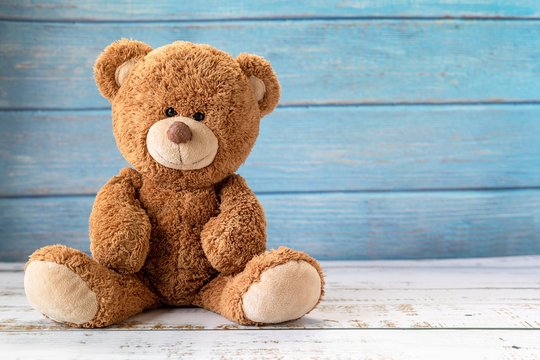

In [7]:
from IPython.display import Image, display
# Some example images
image_files = [

    'teddy_bear.jpg'
]
for image_file in image_files:
    print(f"nDisplaying image with Image Name: {image_file}")
    display(Image(filename=f"images/{image_file}"))


In [4]:
import os
dir_name = "images_with_boxes"
if not os.path.exists(dir_name):
    os.mkdir(dir_name)

In [12]:


def detect_and_draw_box(filename, model="yolov3-tiny", confidence=0.6):
    """Detects common objects on an image and creates a new image with bounding boxes.
    Args:
        filename (str): Filename of the image.
        model (str): Either "yolov3" or "yolov3-tiny". Defaults to "yolov3-tiny".
        confidence (float, optional): Desired confidence level. Defaults to 0.6.
    """
    # Images are stored under the images/ directory
    img_filepath = f'images/{filename}'
    # Read the image into a numpy array
    img = cv2.imread(img_filepath)
    # Perform the object detection
    bbox, label, conf = cv.detect_common_objects(img, confidence=confidence, model=model)
    # Print current image's filename
    print(f"========================nImage processed: {filename}n")
    # Print detected objects with confidence level
    for l, c in zip(label, conf):
        print(f"Detected object: {l} with confidence level of {c}n")
    # Create a new image that includes the bounding boxes
    output_image = draw_bbox(img, bbox, label, conf)
    # Save the image in the directory images_with_boxes
    cv2.imwrite(f'images_with_boxes/{filename}', output_image)
    # Display the image with bounding boxes
    display(Image(f'images_with_boxes/{filename}'))

========================nImage processed: teddy_bear.jpgn
Detected object: teddy bear with confidence level of 0.6347653269767761n


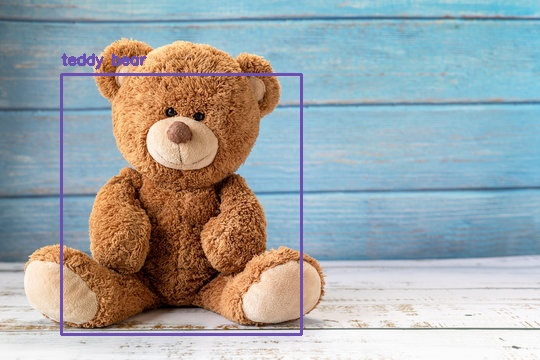

In [13]:
for image_file in image_files:
    detect_and_draw_box(image_file)

In [18]:
from ultralytics import YOLO
import cv2
import math 
# start webcam
cap = cv2.VideoCapture(0)
cap.set(3, 640)
cap.set(4, 480)

# model
model = YOLO("yolo-Weights/yolov8n.pt")

# object classes
classNames = ["person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck", "boat",
              "traffic light", "fire hydrant", "stop sign", "parking meter", "bench", "bird", "cat",
              "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "backpack", "umbrella",
              "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball", "kite", "baseball bat",
              "baseball glove", "skateboard", "surfboard", "tennis racket", "bottle", "wine glass", "cup",
              "fork", "knife", "spoon", "bowl", "banana", "apple", "sandwich", "orange", "broccoli",
              "carrot", "hot dog", "pizza", "donut", "cake", "chair", "sofa", "pottedplant", "bed",
              "diningtable", "toilet", "tvmonitor", "laptop", "mouse", "remote", "keyboard", "cell phone",
              "microwave", "oven", "toaster", "sink", "refrigerator", "book", "clock", "vase", "scissors",
              "teddy bear", "hair drier", "toothbrush"
              ]


while True:
    success, img = cap.read()
    results = model(img, stream=True)

    # coordinates
    for r in results:
        boxes = r.boxes

        for box in boxes:
            # bounding box
            x1, y1, x2, y2 = box.xyxy[0]
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2) # convert to int values

            # put box in cam
            cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 255), 3)

            # confidence
            confidence = math.ceil((box.conf[0]*100))/100
            print("Confidence --->",confidence)

            # class name
            cls = int(box.cls[0])
            print("Class name -->", classNames[cls])

            # object details
            org = [x1, y1]
            font = cv2.FONT_HERSHEY_SIMPLEX
            fontScale = 1
            color = (255, 0, 0)
            thickness = 2

            cv2.putText(img, classNames[cls], org, font, fontScale, color, thickness)

    cv2.imshow('Webcam', img)
    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


100%|██████████| 6.23M/6.23M [00:00<00:00, 7.24MB/s]



Confidence ---> 0.95
Class name --> person
0: 480x640 1 person, 133.2ms
Speed: 0.0ms preprocess, 133.2ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

Confidence ---> 0.94
Class name --> person
0: 480x640 1 person, 64.5ms
Speed: 2.0ms preprocess, 64.5ms inference, 12.7ms postprocess per image at shape (1, 3, 480, 640)

Confidence ---> 0.94
Class name --> person
0: 480x640 1 person, 79.8ms
Speed: 0.0ms preprocess, 79.8ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

Confidence ---> 0.93
Class name --> person
0: 480x640 1 person, 77.9ms
Speed: 0.0ms preprocess, 77.9ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

Confidence ---> 0.93
Class name --> person
0: 480x640 1 person, 75.5ms
Speed: 0.0ms preprocess, 75.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

Confidence ---> 0.94
Class name --> person
0: 480x640 1 person, 81.8ms
Speed: 0.0ms preprocess, 81.8ms inference, 0.0ms postprocess per image at shape 